In [11]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mp
import seaborn as sns
import itertools

N_files = 24

find_numbers = lambda string: re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", string)
find_value = lambda string: float(find_numbers(string)[-1]) if(len(find_numbers(string))>0) else 0

In [12]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as mp
import seaborn as sns
import itertools

N_files = 24

find_numbers = lambda string: re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", string)
find_value = lambda string: float(find_numbers(string)[-1]) if(len(find_numbers(string))>0) else 0

In [13]:
f = open("out/log_1.txt")

for i, x in enumerate(f):
    print(i,x)

0 

1 

2                                  ------------------------------------

3 

4                                     S   N   N      T r a c k i n g

5 

6                                  ------------------------------------

7 

8 

9 

10 

11          ------------------------------------------------------------------------------------    

12          Unsupervised search for tracks in 8-layer strip detector with spiking neural network    

13                                                                              T.Dorigo, 3/2023    

14          ------------------------------------------------------------------------------------    

15 

16          Run parameters: 

17          -----------------------------------

18                        L0 neurons: 6

19                        L1 neurons: 6

20             Connected L0-L1 frac.: 1

21             Connected IN-L0 frac.: 1

22             Connected IN-L1 frac.: 1

23                     Track classes: 6

24           

In [22]:
#efficiency  -> line 62
#fake rate   -> line 63
#Q value     -> line 64
#selectivity -> line 65

metrics_list = []

for i in range(N_files):
    f = open(f"out/log_{i}.txt")
    log_lines = f.readlines()
    if(len(log_lines)>65):
        efficiency  = find_value(log_lines[62])
        fkrate      = find_value(log_lines[63])
        Qvalue      = find_value(log_lines[64])
        selectivity = find_value(log_lines[65])
    
        metrics = (efficiency, fkrate, Qvalue, selectivity)
        print(i, *metrics)
    
        metrics_list.append((i, efficiency, fkrate, Qvalue, selectivity))
    else:
        metrics_list.append((i, -1, -1, -1, -1))

print("Selectivity maximum: ")
print(max([line[-1] for line in metrics_list]))
print("Fk min")
print(min([line[2] for line in metrics_list if line[2]>0]))

0 1.0 0.9966 0.856113 -0.100833
1 0.0 0.0 0.0 0.0
2 1.0 0.9966 1.12027 0.244643
3 1.0 0.9966 0.84196 -0.119342
4 1.0 0.9966 0.851196 -0.107263
5 1.0 0.9966 1.0521 0.155487
6 1.0 0.9952 0.975895 0.0549238
7 1.0 0.9966 1.02679 0.122388
8 0.994651 0.995 1.22665 0.3869
9 1.0 0.9966 0.905358 -0.0364271
10 1.0 0.9966 0.991851 0.0766931
11 0.997223 0.9966 1.18987 0.337919
12 0.0 0.0 0.0 0.0
13 0.0 0.0 0.0 0.0
14 0.0 0.0 0.0 0.0
15 0.0 0.0 0.0 0.0
16 0.999804 0.9946 1.17772 0.318358
17 0.0 0.0 0.0 0.0
18 0.582007 0.0018 3.52088 0.187382
19 0.622714 0.0018 3.78718 0.187842
20 0.582259 0.0018 2.96107 0.00900943
21 0.882828 0.033 0 1.0
22 0.886182 0.036 5.20133 0.231378
23 0.873782 0.0368 5.01751 0.212491
Selectivity maximum: 
1.0
Fk min
0.0018


    PK  Efficiency  Fake Rate   Q value  Selectivity
0    0    1.000000     0.9966  0.856113    -0.100833
1    1    0.000000     0.0000  0.000000     0.000000
2    2    1.000000     0.9966  1.120270     0.244643
3    3    1.000000     0.9966  0.841960    -0.119342
4    4    1.000000     0.9966  0.851196    -0.107263
5    5    1.000000     0.9966  1.052100     0.155487
6    6    1.000000     0.9952  0.975895     0.054924
7    7    1.000000     0.9966  1.026790     0.122388
8    8    0.994651     0.9950  1.226650     0.386900
9    9    1.000000     0.9966  0.905358    -0.036427
10  10    1.000000     0.9966  0.991851     0.076693
11  11    0.997223     0.9966  1.189870     0.337919
12  12    0.000000     0.0000  0.000000     0.000000
13  13    0.000000     0.0000  0.000000     0.000000
14  14    0.000000     0.0000  0.000000     0.000000
15  15    0.000000     0.0000  0.000000     0.000000
16  16    0.999804     0.9946  1.177720     0.318358
17  17    0.000000     0.0000  0.000000     0.

<Axes: xlabel='PK', ylabel='Selectivity'>

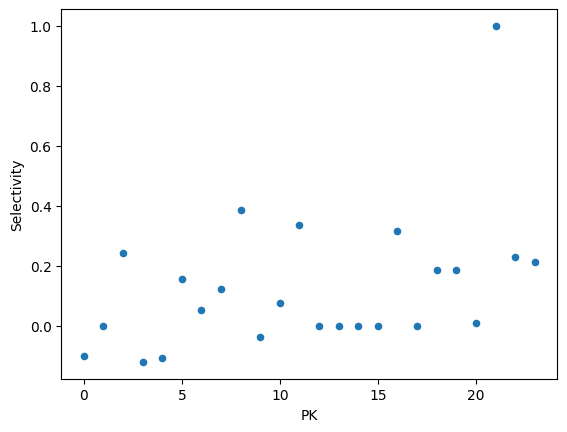

In [15]:
#creating a pandas dataframe:
df = pd.DataFrame(metrics_list, columns =['PK', 'Efficiency', 'Fake Rate', 'Q value', 'Selectivity'])
print(df)
df.plot(x="PK", y="Selectivity", kind="scatter")


In [16]:
NL0_list =          [6, 15, 25]       
CFI0_list =         [1, 0.8, 0.6] 
a_list =            [0.1, 0.5, 0.8, 10]      #alfa parameter -> inhibition strength
Thresh0 =           [0.2, 0.3, 0.4, 0.5]


parameters_list = (Thresh0, NL0_list, CFI0_list, a_list)
#----------------------------------------------------------------
tot_comb = 1
for param in parameters_list:
    tot_comb*=len(param)
    
#File creation
#create an iterator with all the possible combinations
all_combinations = itertools.product(*parameters_list)

combo_list = [(i, *combination) for i, combination in enumerate(all_combinations)]

combo_df = pd.DataFrame(combo_list, columns=["PK","TH", "N", "CF", "alfa"])
print(combo_df)

      PK   TH   N   CF  alfa
0      0  0.2   6  1.0   0.1
1      1  0.2   6  1.0   0.5
2      2  0.2   6  1.0   0.8
3      3  0.2   6  1.0  10.0
4      4  0.2   6  0.8   0.1
..   ...  ...  ..  ...   ...
139  139  0.5  25  0.8  10.0
140  140  0.5  25  0.6   0.1
141  141  0.5  25  0.6   0.5
142  142  0.5  25  0.6   0.8
143  143  0.5  25  0.6  10.0

[144 rows x 5 columns]


In [17]:
#inner join using PK field
join_df = df.join(combo_df.set_index("PK"), on="PK")
print (join_df)

    PK  Efficiency  Fake Rate   Q value  Selectivity   TH   N   CF  alfa
0    0    1.000000     0.9966  0.856113    -0.100833  0.2   6  1.0   0.1
1    1    0.000000     0.0000  0.000000     0.000000  0.2   6  1.0   0.5
2    2    1.000000     0.9966  1.120270     0.244643  0.2   6  1.0   0.8
3    3    1.000000     0.9966  0.841960    -0.119342  0.2   6  1.0  10.0
4    4    1.000000     0.9966  0.851196    -0.107263  0.2   6  0.8   0.1
5    5    1.000000     0.9966  1.052100     0.155487  0.2   6  0.8   0.5
6    6    1.000000     0.9952  0.975895     0.054924  0.2   6  0.8   0.8
7    7    1.000000     0.9966  1.026790     0.122388  0.2   6  0.8  10.0
8    8    0.994651     0.9950  1.226650     0.386900  0.2   6  0.6   0.1
9    9    1.000000     0.9966  0.905358    -0.036427  0.2   6  0.6   0.5
10  10    1.000000     0.9966  0.991851     0.076693  0.2   6  0.6   0.8
11  11    0.997223     0.9966  1.189870     0.337919  0.2   6  0.6  10.0
12  12    0.000000     0.0000  0.000000     0.00000

<Axes: xlabel='TH-alfa-CF', ylabel='N'>

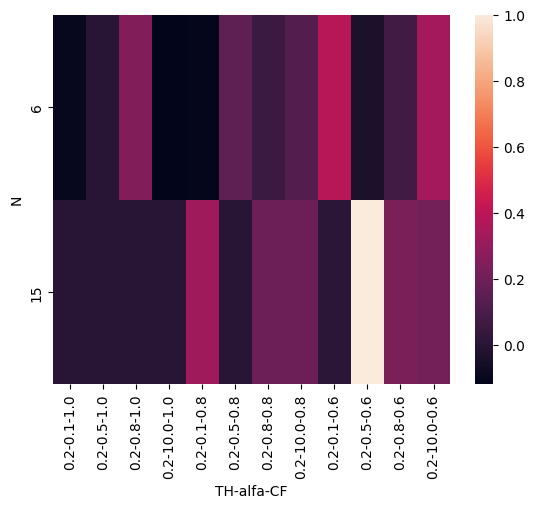

In [18]:
sns.heatmap(join_df.pivot(index="N", columns=["TH", "alfa", "CF"], values="Selectivity"))

<Axes: xlabel='TH-CF-alfa', ylabel='N'>

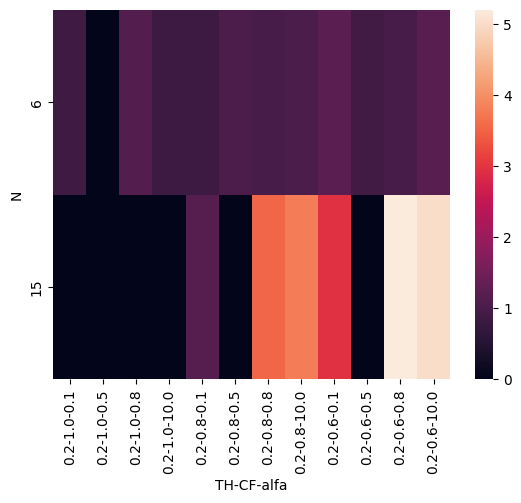

In [19]:
sns.heatmap(join_df.pivot(index="N", columns=["TH", "CF", "alfa"], values="Q value"))


<Axes: xlabel='TH-CF-alfa', ylabel='N'>

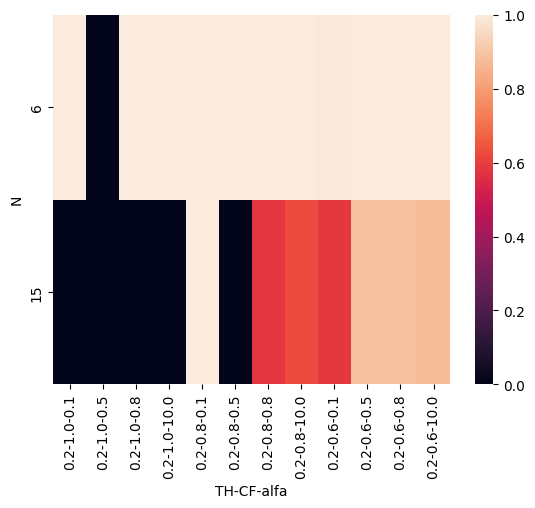

In [20]:
sns.heatmap(join_df.pivot(index="N", columns=["TH", "CF", "alfa"], values="Efficiency"))

<Axes: xlabel='TH-CF-alfa', ylabel='N'>

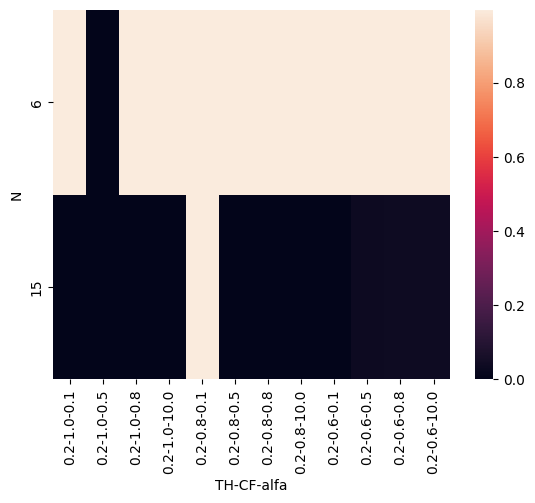

In [21]:
sns.heatmap(join_df.pivot(index="N", columns=["TH", "CF", "alfa"], values="Fake Rate"))